# SVM MODEL

In [ ]:
import pandas as pd
import numpy as np


from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Loading dataset

In [ ]:
data=pd.read_csv('forestfires.csv')
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,small


<b> DATA PREPROCESSING </b>

In [ ]:
np.unique(data['size_category'])

<IPython.core.display.Javascript object>

array(['large', 'small'], dtype=object)

In [ ]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
data['size_category'] = data['size_category'].map({'large': 1, 'small': 0})
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data2=data.drop(['month', 'day'],1)
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


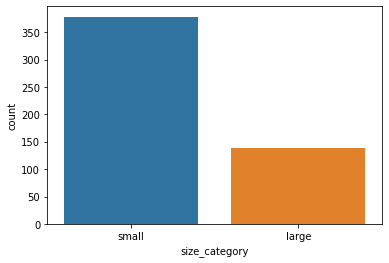

In [ ]:
sns.countplot(data.size_category);

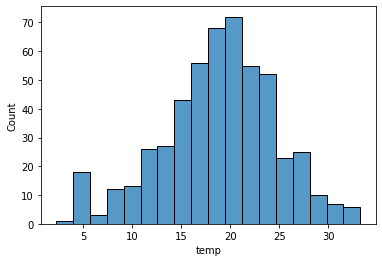

In [ ]:
# Temperature range
sns.histplot(data['temp']);

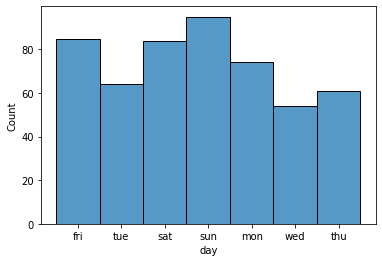

In [ ]:
# Highest number of forest fires are occuring on sundays.
sns.histplot(data['day']);

In [ ]:
x=data2.iloc[:,:28]
y=data2.iloc[:,28]

In [ ]:
# Splitting data into training and testing data set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

### Tuning svm model with different values of parameters 'gmma' , 'c' and kernal='rbf' for best accuracy

In [ ]:
model = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,60],'C':[15,14,13,12,11,10,0.1,0.001,1,2] }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 1, 2],
                          'gamma': [50, 5, 10, 0.5, 60], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Accoriding to above gridsearch method  these are the best parameters 

In [ ]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7535285285285285)

In [ ]:
# Building model with above parameteres

In [ ]:
model_2=SVC(C=15,gamma=0.5,kernel='rbf')
model_2.fit(x_train , y_train)
y_pred = model_2.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 71.15384615384616


<b> We got the accuracy as 71.1% for our model.Here there is difference of 4% accuracy for train and test data  </b>

### Tuning svm model only 'c' parameter and kernal='rbf'

In [ ]:
# Keeping 'gamma' as defalut

In [ ]:
model_test = SVC()
param_grid = [{'kernel':['rbf'],'C':[15,0.1,0.001,1,2,16,17,20,25,30,50,120] }]
gsv = GridSearchCV(model_test,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15, 0.1, 0.001, 1, 2, 16, 17, 20, 25, 30, 50,
                                120],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Accoriding to above gridsearch parameters these are the best 

In [ ]:
gsv.best_params_ , gsv.best_score_ 

({'C': 120, 'kernel': 'rbf'}, 0.9224474474474474)

<b>Final Model</b>

In [ ]:
# Building model with above parameteres

In [ ]:
model_final = SVC(C=120,kernel='rbf')
model_final.fit(x_train , y_train)

SVC(C=120, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting for test data

In [ ]:
y_pred = model_final.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[110,   0],
       [ 14,  32]], dtype=int64)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 91.02564102564102


<b> We got the accuracy as 91.1% for our model.Here there is only difference of 1% accuracy for train and test data </b>